In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import mutual_info_classif
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import auc, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

C:\Users\mdsouza\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [78]:
data = pd.read_csv('NEW_final_dataset.csv', sep=',', keep_default_na=False, na_values=[''])

In [79]:
data.shape

(379, 172)

In [80]:
#Initial dataset check
data.head(10)

,Region,State,Labor_raw_change,Labor_pct_change,Unemployment_avg,Unemployment_change,Pop_pct_change,Pop_chg_avg,Int_mig_avg,Dom_mig_avg,...,Dependency Based on Income Sources (Ratio)_rank,Net Migration (Average)_index value,Net Migration (Average)_rank,Compensation Core Index_index value,Compensation Core Index_rank,Growth in Wage/Salary Earnings per Worker (Average Annual)_index value,Growth in Wage/Salary Earnings per Worker (Average Annual)_rank,Change in ProprietorsÌ» Income per Proprietor (Average Annual)_index value,Change in ProprietorsÌ» Income per Proprietor (Average Annual)_rank,Success
0,"Abilene, TX",TX,-1943,-0.025416,5.30,-0.44,0.03,730,356,-281,...,205,123.5,113,178.6,17,176.7,36,180.4,36,0
1,"Akron, OH",OH,-13892,-0.037323,7.19,-0.52,0.00,-140,1146,-1694,...,165,77.4,297,129.3,91,82.5,267,176.0,44,0
2,"Albany, GA",GA,-4311,-0.060919,9.23,-0.47,0.01,240,72,-505,...,322,116.0,127,62.2,372,74.4,312,50.0,379,0
3,"Albany, OR",OR,57,0.000999,9.31,-0.55,0.05,2542,537,1689,...,367,54.5,375,80.1,307,62.2,354,97.9,190,0
4,"Albany-Schenectady-Troy, NY",NY,-11060,-0.024090,5.94,-0.44,-0.03,-360,80,-476,...,120,92.5,201,111.7,163,97.7,173,125.7,129,1
5,"Albuquerque, NM",NM,-2437,-0.005737,6.90,-0.24,0.02,3261,908,-919,...,220,104.4,152,69.2,353,82.9,266,55.6,362,1
6,"Alexandria, LA",LA,-1462,-0.021688,7.00,-0.18,0.05,3540,631,405,...,319,100.1,162,130.7,82,143.8,74,117.5,149,0
7,"Allentown-Bethlehem-Easton, PA-NJ",PA-NJ,15641,0.037285,7.27,-0.42,0.02,2055,2465,-988,...,169,90.5,217,80.0,308,81.8,271,78.1,279,1
8,"Altoona, PA",PA,-698,-0.011299,6.56,-0.34,-0.02,-347,30,-179,...,339,83.3,254,84.1,284,87.3,241,80.9,266,0
9,"Amarillo, TX",TX,1842,0.014212,4.34,-0.46,0.14,121710,27660,40463,...,103,66.1,350,162.0,30,148.9,68,175.1,46,0


In [81]:
#Dataset check
data.describe()

,Labor_raw_change,Labor_pct_change,Unemployment_avg,Unemployment_change,Pop_pct_change,Pop_chg_avg,Int_mig_avg,Dom_mig_avg,Net_mig_avg,GDP_Average,...,Dependency Based on Income Sources (Ratio)_rank,Net Migration (Average)_index value,Net Migration (Average)_rank,Compensation Core Index_index value,Compensation Core Index_rank,Growth in Wage/Salary Earnings per Worker (Average Annual)_index value,Growth in Wage/Salary Earnings per Worker (Average Annual)_rank,Change in ProprietorsÌ» Income per Proprietor (Average Annual)_index value,Change in ProprietorsÌ» Income per Proprietor (Average Annual)_rank,Success
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,...,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,13431.960422,0.014536,7.255805,-0.456834,0.039551,5474.641161,2100.897098,272.978892,2373.828496,1.239842,...,189.633245,108.627177,188.839050,109.127177,190.659631,107.397361,190.693931,110.858839,190.770449,0.292876
std,43795.500425,0.058162,2.213127,0.120156,0.050048,14416.562522,8066.455499,9570.725005,8352.288161,1.626124,...,109.467494,38.729936,109.822743,32.386233,110.353869,39.019989,110.313868,42.542094,110.294280,0.455684
min,-26133.000000,-0.153870,3.090000,-0.740000,-0.120000,-3092.000000,-53.000000,-128945.000000,-37237.000000,-3.470000,...,1.000000,50.000000,1.000000,53.500000,1.000000,50.000000,1.000000,50.000000,1.000000,0.000000
25%,-2117.500000,-0.020486,6.050000,-0.540000,0.000000,168.500000,126.500000,-855.500000,-373.000000,0.180000,...,95.500000,79.150000,93.000000,84.100000,95.500000,79.800000,95.500000,75.950000,96.500000,0.000000
50%,1326.000000,0.014075,7.090000,-0.470000,0.040000,1221.000000,393.000000,-99.000000,359.000000,1.230000,...,190.000000,95.000000,187.000000,106.100000,189.000000,94.900000,191.000000,97.900000,190.000000,0.000000
75%,7677.000000,0.045318,8.035000,-0.390000,0.070000,3796.500000,1150.000000,1107.500000,1888.000000,2.090000,...,283.000000,134.900000,283.500000,128.450000,284.000000,131.850000,286.000000,142.900000,287.500000,1.000000
max,383912.000000,0.213675,25.940000,0.060000,0.320000,121710.000000,121243.000000,43495.000000,68122.000000,9.410000,...,378.000000,200.000000,379.000000,199.900000,380.000000,200.000000,380.000000,199.900000,379.000000,1.000000


In [82]:
#rows and columns in dataset
data.shape

(379, 172)

# Data Cleaning

In [7]:
#Replace NA in categorical columns
data['custAge'].fillna(np.mean(data['custAge']), inplace=True)
data['schooling'].fillna('unknown', inplace=True)
week_day = data['day_of_week'].value_counts().index[0]
data['day_of_week'] = data['day_of_week'].fillna(week_day)

In [83]:
#check for blank values & fill in missing values
col = []
col = data.isnull().sum()
if col.any()>0:
    print(col)

In [9]:
#Change string to numeric
data['responded'] = data['responded'].map({'yes': 1, 'no': 0})

In [84]:
data.dtypes

Region                                                                         object
State                                                                          object
Labor_raw_change                                                                int64
Labor_pct_change                                                              float64
Unemployment_avg                                                              float64
Unemployment_change                                                           float64
Pop_pct_change                                                                float64
Pop_chg_avg                                                                     int64
Int_mig_avg                                                                     int64
Dom_mig_avg                                                                     int64
Net_mig_avg                                                                     int64
GDP_Average                                           

# Data Analysis

In [85]:
data.groupby(data.Success).mean()

,Labor_raw_change,Labor_pct_change,Unemployment_avg,Unemployment_change,Pop_pct_change,Pop_chg_avg,Int_mig_avg,Dom_mig_avg,Net_mig_avg,GDP_Average,...,Dependency Based on Income Sources (Ratio)_index value,Dependency Based on Income Sources (Ratio)_rank,Net Migration (Average)_index value,Net Migration (Average)_rank,Compensation Core Index_index value,Compensation Core Index_rank,Growth in Wage/Salary Earnings per Worker (Average Annual)_index value,Growth in Wage/Salary Earnings per Worker (Average Annual)_rank,Change in ProprietorsÌ» Income per Proprietor (Average Annual)_index value,Change in ProprietorsÌ» Income per Proprietor (Average Annual)_rank
Success,,,,,,,,,,,,,,,,,,,,,
0,1988.223881,0.005717,7.267388,-0.447239,0.035522,4653.205224,1533.104478,685.597015,2218.630597,1.046045,...,107.930970,206.014925,113.810821,177.444030,110.664179,185.492537,107.18097,192.503731,114.147761,183.238806
1,41061.882883,0.035827,7.227838,-0.480000,0.049279,7457.927928,3471.783784,-723.252252,2748.540541,1.707748,...,129.405405,150.081081,96.111712,216.351351,105.416216,203.135135,107.91982,186.324324,102.918018,208.954955


In [21]:
print(data.Labor_pct_change.mean())
# mean: 0.022411785352611943
data.groupby(data.Labor_pct_change).max()

0.014535571171503947


,Region,State,Labor_raw_change,Unemployment_avg,Unemployment_change,Pop_pct_change,Pop_chg_avg,Int_mig_avg,Dom_mig_avg,Net_mig_avg,...,Compensation Core Index_index value,Compensation Core Index_rank,Compensation Core Index_median value,Growth in Wage/Salary Earnings per Worker (Average Annual)_index value,Growth in Wage/Salary Earnings per Worker (Average Annual)_rank,Growth in Wage/Salary Earnings per Worker (Average Annual)_median value,Change in ProprietorsÌ» Income per Proprietor (Average Annual)_index value,Change in ProprietorsÌ» Income per Proprietor (Average Annual)_rank,Change in ProprietorsÌ» Income per Proprietor (Average Annual)_median value,Success
Labor_pct_change,,,,,,,,,,,,,,,,,,,,,
-0.153870,"Pine Bluff, AR",AR,-6549,8.71,-0.47,-0.08,-1185,18,-1290,-1272,...,73.8,334,105.9,87.8,236,95,59.9,349,97.9,0
-0.125451,"Elmira, NY",NY,-5218,7.19,-0.32,0.03,468,963,-693,270,...,189.1,11,105.9,185.5,26,95,192.6,16,97.9,0
-0.123470,"Binghamton, NY",NY,-15361,7.26,-0.38,-0.02,-368,46,-316,-270,...,123.2,117,105.9,58.0,364,95,188.5,26,97.9,0
-0.119881,"Sierra Vista-Douglas, AZ",AZ,-6836,8.39,-0.34,0.03,5135,1824,482,2306,...,121.8,122,105.9,172.8,40,95,70.9,313,97.9,0
-0.116280,"Atlantic City-Hammonton, NJ",NJ,-16349,10.94,-0.40,-0.03,-405,209,-241,-32,...,54.9,379,105.9,56.2,370,95,53.5,370,97.9,0
-0.116094,"Weirton-Steubenville, WV-OH",WV-OH,-6783,9.61,-0.42,-0.03,-710,27,-325,-298,...,106.1,189,105.9,65.4,343,95,146.9,89,97.9,0
-0.111814,"Anniston-Oxford-Jacksonville, AL",AL,-5765,8.73,-0.41,0.14,3757,196,3201,3397,...,113.9,157,105.9,81.7,272,95,146.1,91,97.9,0
-0.098595,"Utica-Rome, NY",NY,-14178,6.93,-0.36,-0.02,-793,692,-1481,-788,...,127.7,99,105.9,93.6,200,95,161.9,65,97.9,0
-0.096938,"Mansfield, OH",OH,-5727,8.23,-0.55,-0.01,-3092,3503,-8339,-4836,...,74.3,332,105.9,50.9,377,95,97.8,191,97.9,0


In [22]:
data.groupby(data.Unemployment_avg).max()

,Region,State,Labor_raw_change,Labor_pct_change,Unemployment_change,Pop_pct_change,Pop_chg_avg,Int_mig_avg,Dom_mig_avg,Net_mig_avg,...,Compensation Core Index_index value,Compensation Core Index_rank,Compensation Core Index_median value,Growth in Wage/Salary Earnings per Worker (Average Annual)_index value,Growth in Wage/Salary Earnings per Worker (Average Annual)_rank,Growth in Wage/Salary Earnings per Worker (Average Annual)_median value,Change in ProprietorsÌ» Income per Proprietor (Average Annual)_index value,Change in ProprietorsÌ» Income per Proprietor (Average Annual)_rank,Change in ProprietorsÌ» Income per Proprietor (Average Annual)_median value,Success
Unemployment_avg,,,,,,,,,,,,,,,,,,,,,
3.09,"Bismarck, ND",ND,5471,0.084738,-0.26,0.14,2408,30,1589,1619,...,176.3,18,105.9,199.7,6,95,152.8,78,97.9,0
3.21,"Fargo, ND-MN",ND-MN,13405,0.109244,-0.37,0.14,4192,715,1776,2491,...,193.0,8,105.9,189.4,22,95,196.6,8,97.9,0
3.26,"Ames, IA",IA,3806,0.071348,-0.43,0.11,9299,1385,3838,5223,...,172.6,24,105.9,156.3,56,95,188.9,24,97.9,0
3.41,"Sioux Falls, SD",SD,12849,0.096204,-0.31,0.08,1578,263,662,811,...,126.8,243,105.9,149.4,279,95,104.1,181,97.9,0
3.47,"Iowa City, IA",IA,5364,0.058503,-0.37,0.04,1408,308,96,404,...,135.6,68,105.9,113.3,126,95,157.9,70,97.9,0
3.60,"Burlington-South Burlington, VT",VT,544,0.004394,-0.48,0.03,872,519,-327,192,...,92.8,238,105.9,93.2,205,95,92.5,210,97.9,0
3.81,"Grand Forks, ND-MN",ND-MN,1811,0.032915,-0.33,0.04,611,277,-203,74,...,186.8,13,105.9,180.2,31,95,193.4,14,97.9,0
3.96,"Grand Island, NE",NE,-380,-0.008662,-0.18,0.08,3538,893,701,1594,...,113.3,159,105.9,119.4,115,95,107.1,173,97.9,0
4.04,"Rapid City, SD",SD,2049,0.029253,-0.43,0.12,3924,629,1340,1969,...,106.2,186,105.9,122.6,109,95,89.9,223,97.9,0


In [23]:
data.boxplot()

SyntaxError: invalid syntax (<ipython-input-23-b6310ba2eb5e>, line 1)

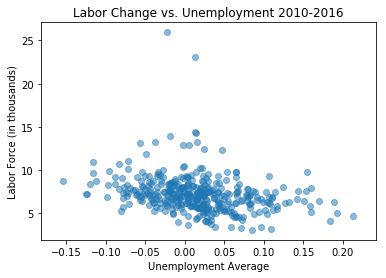

In [24]:
plt.scatter(data.Labor_pct_change, data.Unemployment_avg, alpha=0.5)
plt.title('Labor Change vs. Unemployment 2010-2016')
plt.xlabel('Unemployment Average')
plt.ylabel('Labor Force (in thousands)')
plt.show()

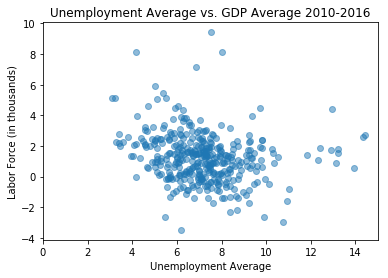

In [37]:
plt.scatter(data.Unemployment_avg, data.GDP_Average, alpha=0.5)
plt.xlim(0,15)
plt.title('Unemployment Average vs. GDP Average 2010-2016')
plt.xlabel('Unemployment Average')
plt.ylabel('Labor Force (in thousands)')
plt.show()

# Data Preprocessing

In [86]:
#Unbalanced Data
data.Success.value_counts()

0    268
1    111
Name: Success, dtype: int64

In [87]:
df_majority = data[data.Success==0]
df_minority = data[data.Success==1]

df_minority_upsampled = resample(df_minority, replace=True, n_samples=268, random_state=123)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled.Success.value_counts()

1    268
0    268
Name: Success, dtype: int64

In [88]:
#Cleaned dataset
data=df_upsampled
data.head(10)

,Region,State,Labor_raw_change,Labor_pct_change,Unemployment_avg,Unemployment_change,Pop_pct_change,Pop_chg_avg,Int_mig_avg,Dom_mig_avg,...,Dependency Based on Income Sources (Ratio)_rank,Net Migration (Average)_index value,Net Migration (Average)_rank,Compensation Core Index_index value,Compensation Core Index_rank,Growth in Wage/Salary Earnings per Worker (Average Annual)_index value,Growth in Wage/Salary Earnings per Worker (Average Annual)_rank,Change in ProprietorsÌ» Income per Proprietor (Average Annual)_index value,Change in ProprietorsÌ» Income per Proprietor (Average Annual)_rank,Success
0,"Abilene, TX",TX,-1943,-0.025416,5.30,-0.44,0.03,730,356,-281,...,205,123.5,113,178.6,17,176.7,36,180.4,36,0
1,"Akron, OH",OH,-13892,-0.037323,7.19,-0.52,0.00,-140,1146,-1694,...,165,77.4,297,129.3,91,82.5,267,176.0,44,0
2,"Albany, GA",GA,-4311,-0.060919,9.23,-0.47,0.01,240,72,-505,...,322,116.0,127,62.2,372,74.4,312,50.0,379,0
3,"Albany, OR",OR,57,0.000999,9.31,-0.55,0.05,2542,537,1689,...,367,54.5,375,80.1,307,62.2,354,97.9,190,0
6,"Alexandria, LA",LA,-1462,-0.021688,7.00,-0.18,0.05,3540,631,405,...,319,100.1,162,130.7,82,143.8,74,117.5,149,0
8,"Altoona, PA",PA,-698,-0.011299,6.56,-0.34,-0.02,-347,30,-179,...,339,83.3,254,84.1,284,87.3,241,80.9,266,0
9,"Amarillo, TX",TX,1842,0.014212,4.34,-0.46,0.14,121710,27660,40463,...,103,66.1,350,162.0,30,148.9,68,175.1,46,0
10,"Ames, IA",IA,3806,0.071348,3.26,-0.43,0.11,9299,1385,3838,...,31,199.8,3,172.6,24,156.3,56,188.9,24,0
11,"Anchorage, AK",AK,1939,0.009683,6.14,-0.18,0.05,3105,1112,-1498,...,50,50.0,379,148.7,42,133.3,93,164.1,60,0
12,"Ann Arbor, MI",MI,9059,0.049557,5.54,-0.58,0.06,2806,1809,-396,...,30,161.7,49,61.2,373,54.6,374,67.9,325,0


In [17]:
#One hot encoding
for column in data.columns:
    if data[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        data[column] = le.fit_transform(data[column])

In [89]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,2:252], data.Success, test_size=0.6, random_state=42)

In [252]:
y_train

40     1
186    1
334    1
199    0
376    1
329    0
246    1
17     1
216    0
17     1
177    0
268    0
364    0
328    0
153    0
159    0
29     1
316    0
167    1
17     1
168    0
34     1
93     1
334    1
325    1
143    0
303    1
41     1
174    0
256    1
      ..
66     0
269    1
332    0
357    0
31     0
140    1
5      1
211    0
230    1
258    0
267    1
105    1
317    1
223    1
346    1
171    0
132    0
349    1
119    0
186    1
372    1
295    0
17     1
160    0
30     0
99     0
141    0
317    1
301    1
136    0
Name: Success, Length: 214, dtype: int64

# Train Models

In [90]:
#Logistic Regression Train
clf_lr=LogisticRegression()
model_lr = clf_lr.fit(X_train,y_train)

In [91]:
#Logistic Regression Test
prediction_lr=model_lr.predict(X_test)
acc_lr=float((prediction_lr==y_test).sum())/float(len(y_test))
print("Logistic Regression: {0:.2f}%".format(acc_lr))
print(classification_report(y_test, prediction_lr))
fpr_lr, tpr_lr, threshold = roc_curve(y_test, prediction_lr)
roc_auc_lr = auc(fpr_lr, fpr_lr)
#Note: not a good model because of too many features 

Logistic Regression: 0.82%
             precision    recall  f1-score   support

          0       0.82      0.82      0.82       160
          1       0.82      0.82      0.82       162

avg / total       0.82      0.82      0.82       322



In [92]:
#SVM Model Train
clf_svm = SVC(C=1)
model_svm=clf_svm.fit(X_train,y_train)

In [93]:
#SVM Model Test
prediction_svm = model_svm.predict(X_test)
acc_svm=float((prediction_svm==y_test).sum())/float(len(y_test))
print("SVM accuracy: {0:.2f}%".format(acc_svm))
print(classification_report(y_test, prediction_svm))
fpr_svm, tpr_svm, threshold_svm = roc_curve(y_test, prediction_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

SVM accuracy: 0.76%
             precision    recall  f1-score   support

          0       0.68      1.00      0.81       160
          1       1.00      0.52      0.69       162

avg / total       0.84      0.76      0.75       322



In [99]:
#RandomForest Model Train
clf_rf = RandomForestClassifier(max_depth=55, max_features=1)
model_rf=clf_rf.fit(X_train,y_train)

In [100]:
#RandomForest Model Test

prediction_rf = model_rf.predict(X_test)
weight=model_rf.feature_importances_
varwgt=pd.DataFrame(list(zip(list(data),weight)),columns=['variable','weight'])
varwgt_sorted=varwgt.reindex(varwgt.weight.abs().sort_values(ascending=False).index)
print("Top 10 weighted variables:")
print(varwgt_sorted[0:10])

acc_rf=float((prediction_rf==y_test).sum())/float(len(y_test))
print("RandomForest Accuracy: {0:.2f}%".format(acc_rf))
print(classification_report(y_test, prediction_rf))

fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, prediction_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

Top 10 weighted variables:
                                              variable    weight
40          University-Based Knowledge Spillovers_rank  0.051785
71   Venture Capital Dollar Measures Core Index_ind...  0.048988
122  Proprietor Income to Total Wages and Salaries_...  0.036275
140             Gross Domestic Product Core Index_rank  0.034331
41           Business Incubator Spillovers_index value  0.033068
136                              Cluster Strength_rank  0.020686
132               Industry Performance Core Index_rank  0.019776
85   Venture Capital Deals (Average Annual)_index v...  0.019032
49     High-Tech Industry Employment Share_index value  0.016864
87        Change in Venture Capital Deals _index value  0.016442
RandomForest Accuracy: 0.86%
             precision    recall  f1-score   support

          0       0.85      0.88      0.87       160
          1       0.88      0.85      0.86       162

avg / total       0.86      0.86      0.86       322



In [101]:
#Decision Tree Train
clf_dt = DecisionTreeClassifier(max_depth=15, max_features=1)
model_dt=clf_dt.fit(X_train,y_train)

In [102]:
prediction_dt = model_dt.predict(X_test)
acc_dt=float((prediction_dt==y_test).sum())/float(len(y_test))
print("Decision Tree Accuracy: {0:.2f}%".format(acc_dt))
print(classification_report(y_test, prediction_dt))

fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test, prediction_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

Decision Tree Accuracy: 0.73%
             precision    recall  f1-score   support

          0       0.76      0.68      0.72       160
          1       0.71      0.79      0.75       162

avg / total       0.74      0.73      0.73       322



In [132]:
#MLP Model Train
clf_mlp = MLPClassifier(hidden_layer_sizes=(200, 100, 50), alpha=1)
model_mlp=clf_mlp.fit(X_train,y_train)

In [133]:
#MLP Model Test
prediction_mlp = model_mlp.predict(X_test)
score_mlp = model_mlp.score(X_test, y_test)
acc_mlp=float((prediction_mlp==y_test).sum())/float(len(y_test))
print("MLP Accuracy: {0:.2f}%".format(acc_mlp))
print(classification_report(y_test, prediction_mlp))
print('Coef Shape') 
print( [coef.shape for coef in clf_mlp.coefs_])

fpr_mlp, tpr_mlp, threshold_mlp = roc_curve(y_test, prediction_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

MLP Accuracy: 0.80%
             precision    recall  f1-score   support

          0       0.82      0.76      0.79       160
          1       0.78      0.83      0.80       162

avg / total       0.80      0.80      0.79       322

Coef Shape
[(170, 200), (200, 100), (100, 50), (50, 1)]


In [245]:
#Adaboost Model Train
clf_a = AdaBoostClassifier(RandomForestClassifier(max_depth=30, max_features='auto'))
model_a=clf_a.fit(X_train,y_train)

In [253]:
#Adaboost Model Test
prediction_a = model_a.predict(X_test)
score_a = model_a.score(X_test, y_test)
acc_a=float((prediction_a==y_test).sum())/float(len(y_test))
print("AdaBoost Accuracy: {0:.2f}%".format(acc_a))
print(classification_report(y_test, prediction_a))

weight=model_a.feature_importances_
varwgt=pd.DataFrame(list(zip(list(data),weight)),columns=['variable','weight'])
varwgt_sorted=varwgt.reindex(varwgt.weight.abs().sort_values(ascending=False).index)
print("Top 10 weighted variables:")
print(varwgt_sorted[0:20])

fpr_a, tpr_a, threshold_a = roc_curve(y_test, prediction_a)
roc_auc_a = auc(fpr_a, tpr_a)

AdaBoost Accuracy: 0.97%
             precision    recall  f1-score   support

          0       0.95      0.99      0.97       160
          1       0.99      0.94      0.97       162

avg / total       0.97      0.97      0.97       322

Top 10 weighted variables:
                                              variable    weight
169  Change in ProprietorsÌ» Income per Proprietor ...  0.153165
69    Traded Sector Establishment Dynamics_index value  0.080416
0                                               Region  0.048654
73      Venture Capital (Average Annual $)_index value  0.044338
71   Venture Capital Dollar Measures Core Index_ind...  0.041763
77            High-Tech Venture Capital  $_index value  0.040004
162    Dependency Based on Income Sources (Ratio)_rank  0.033326
43   STEM Education and Occupations Core Index_inde...  0.032996
50            High-Tech Industry Employment Share_rank  0.029461
41           Business Incubator Spillovers_index value  0.028588
144               

# Compare Area Under the Curve

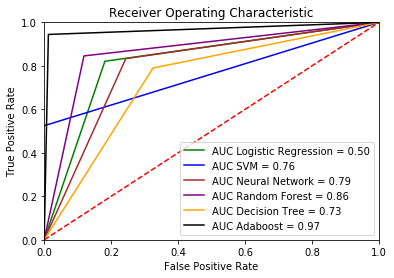

In [247]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'b', color='green', label = 'AUC Logistic Regression = %0.2f' % roc_auc_lr)
plt.plot(fpr_svm, tpr_svm, 'b', color='blue', label = 'AUC SVM = %0.2f' % roc_auc_svm)
plt.plot(fpr_mlp, tpr_mlp, 'b',color='brown', label = 'AUC Neural Network = %0.2f' % roc_auc_mlp)
plt.plot(fpr_rf, tpr_rf, 'b', color='purple', label = 'AUC Random Forest = %0.2f' % roc_auc_rf)
plt.plot(fpr_dt, tpr_dt, 'b',color='orange', label = 'AUC Decision Tree = %0.2f' % roc_auc_dt)
plt.plot(fpr_a, tpr_a, 'b',color='black', label = 'AUC Adaboost = %0.2f' % roc_auc_a)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Migration Pattern Test File

In [212]:
# Apply Model to marketing_test.csv
data_test = pd.read_csv('migration_pattern_test.csv', sep=',', keep_default_na=False, na_values=[''])

In [213]:
data_test.head(10)

,Region,Labor_raw_change,Labor_pct_change,Unemployment_avg,Unemployment_change,Pop_pct_change,Pop_chg_avg,Int_mig_avg,Dom_mig_avg,Net_mig_avg,...,Dependency Based on Income Sources (Ratio)_index value,Dependency Based on Income Sources (Ratio)_rank,Net Migration (Average)_index value,Net Migration (Average)_rank,Compensation Core Index_index value,Compensation Core Index_rank,Growth in Wage/Salary Earnings per Worker (Average Annual)_index value,Growth in Wage/Salary Earnings per Worker (Average Annual)_rank,Change in ProprietorsÌ» Income per Proprietor (Average Annual)_index value,Change in ProprietorsÌ» Income per Proprietor (Average Annual)_rank
0,"Abilene, TX",-1943,-0.025416,5.30,-0.44,0.03,730,356,-281,75,...,97.9,205,123.5,113,178.6,17,176.7,36,180.4,36
1,"Akron, OH",-13892,-0.037323,7.19,-0.52,0.00,-140,1146,-1694,-548,...,119.9,165,77.4,297,129.3,91,82.5,267,176.0,44
2,"Albany, GA",-4311,-0.060919,9.23,-0.47,0.01,240,72,-505,-433,...,65.2,322,116.0,127,62.2,372,74.4,312,50.0,379
3,"Albany, OR",57,0.000999,9.31,-0.55,0.05,2542,537,1689,2227,...,53.1,367,54.5,375,80.1,307,62.2,354,97.9,190
4,"Albany-Schenectady-Troy, NY",-11060,-0.024090,5.94,-0.44,-0.03,-360,80,-476,-396,...,142.4,120,92.5,201,111.7,163,97.7,173,125.7,129
5,"Albuquerque, NM",-2437,-0.005737,6.90,-0.24,0.02,3261,908,-919,-11,...,94.9,220,104.4,152,69.2,353,82.9,266,55.6,362
6,"Alexandria, LA",-1462,-0.021688,7.00,-0.18,0.05,3540,631,405,1036,...,66.2,319,100.1,162,130.7,82,143.8,74,117.5,149
7,"Allentown-Bethlehem-Easton, PA-NJ",15641,0.037285,7.27,-0.42,0.02,2055,2465,-988,1477,...,118.6,169,90.5,217,80.0,308,81.8,271,78.1,279
8,"Altoona, PA",-698,-0.011299,6.56,-0.34,-0.02,-347,30,-179,-148,...,60.9,339,83.3,254,84.1,284,87.3,241,80.9,266
9,"Amarillo, TX",1842,0.014212,4.34,-0.46,0.14,121710,27660,40463,68122,...,149.3,103,66.1,350,162.0,30,148.9,68,175.1,46


In [201]:
#One hot encoding
le = preprocessing.LabelEncoder()
data_test['Region'] = le.fit_transform(data_test['Region'])

In [214]:
#check for blank values & fill in missing values
data_test.isnull().sum()

Region                                                                        0
Labor_raw_change                                                              0
Labor_pct_change                                                              0
Unemployment_avg                                                              0
Unemployment_change                                                           0
Pop_pct_change                                                                0
Pop_chg_avg                                                                   0
Int_mig_avg                                                                   0
Dom_mig_avg                                                                   0
Net_mig_avg                                                                   0
GDP_Average                                                                   0
GDP Change                                                                    0
Avg_crime                               

In [215]:
data_test.to_csv('clean_test.csv')
clean_test = pd.read_csv('clean_test.csv', sep=',', keep_default_na=False, na_values=[''], index_col=1)
output_data = pd.read_csv('clean_test.csv', sep=',', keep_default_na=False, na_values=[''], index_col=1)
clean_test.head(10)

,Unnamed: 0,Labor_raw_change,Labor_pct_change,Unemployment_avg,Unemployment_change,Pop_pct_change,Pop_chg_avg,Int_mig_avg,Dom_mig_avg,Net_mig_avg,...,Dependency Based on Income Sources (Ratio)_index value,Dependency Based on Income Sources (Ratio)_rank,Net Migration (Average)_index value,Net Migration (Average)_rank,Compensation Core Index_index value,Compensation Core Index_rank,Growth in Wage/Salary Earnings per Worker (Average Annual)_index value,Growth in Wage/Salary Earnings per Worker (Average Annual)_rank,Change in Proprietors̻ Income per Proprietor (Average Annual)_index value,Change in Proprietors̻ Income per Proprietor (Average Annual)_rank
Region,,,,,,,,,,,,,,,,,,,,,
"Abilene, TX",0,-1943,-0.025416,5.30,-0.44,0.03,730,356,-281,75,...,97.9,205,123.5,113,178.6,17,176.7,36,180.4,36
"Akron, OH",1,-13892,-0.037323,7.19,-0.52,0.00,-140,1146,-1694,-548,...,119.9,165,77.4,297,129.3,91,82.5,267,176.0,44
"Albany, GA",2,-4311,-0.060919,9.23,-0.47,0.01,240,72,-505,-433,...,65.2,322,116.0,127,62.2,372,74.4,312,50.0,379
"Albany, OR",3,57,0.000999,9.31,-0.55,0.05,2542,537,1689,2227,...,53.1,367,54.5,375,80.1,307,62.2,354,97.9,190
"Albany-Schenectady-Troy, NY",4,-11060,-0.024090,5.94,-0.44,-0.03,-360,80,-476,-396,...,142.4,120,92.5,201,111.7,163,97.7,173,125.7,129
"Albuquerque, NM",5,-2437,-0.005737,6.90,-0.24,0.02,3261,908,-919,-11,...,94.9,220,104.4,152,69.2,353,82.9,266,55.6,362
"Alexandria, LA",6,-1462,-0.021688,7.00,-0.18,0.05,3540,631,405,1036,...,66.2,319,100.1,162,130.7,82,143.8,74,117.5,149
"Allentown-Bethlehem-Easton, PA-NJ",7,15641,0.037285,7.27,-0.42,0.02,2055,2465,-988,1477,...,118.6,169,90.5,217,80.0,308,81.8,271,78.1,279
"Altoona, PA",8,-698,-0.011299,6.56,-0.34,-0.02,-347,30,-179,-148,...,60.9,339,83.3,254,84.1,284,87.3,241,80.9,266


In [216]:
#apply model
with open('output.csv','w') as f: 
    result = []
    for row in clean_test.values:
        pred = model_a.predict(row)
        result.append(pred)
    output_data['Success'] = result

In [219]:
output_data.to_csv('output.csv')

In [217]:
output_data.count

<bound method DataFrame.count of                                               Unnamed: 0  Labor_raw_change  \
Region                                                                       
Abilene, TX                                            0             -1943   
Akron, OH                                              1            -13892   
Albany, GA                                             2             -4311   
Albany, OR                                             3                57   
Albany-Schenectady-Troy, NY                            4            -11060   
Albuquerque, NM                                        5             -2437   
Alexandria, LA                                         6             -1462   
Allentown-Bethlehem-Easton, PA-NJ                      7             15641   
Altoona, PA                                            8              -698   
Amarillo, TX                                           9              1842   
Ames, IA                       